Erreur :  0.09526385498026609


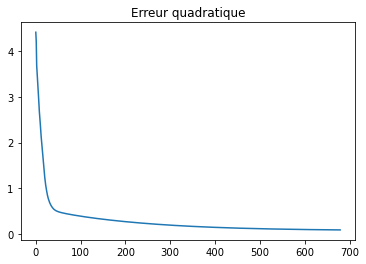

le taux d'apprentissage est :  100.0 %
le taux de reconnaissance est :  82.92682926829268 %
A


SystemExit: 0

C:\Users\TOSHIBA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QFileDialog, QLabel
from PyQt5.QtGui import QPixmap


def apprentissage():
    y = np.array([1,1,1,1,1, 2,2,2, 3,3, 4,4, 5,5,5, 6,6, 7,7, 8,8, 9,9,9,9,9, 10,10, 11,11, 12,12, 13,13, 14,14, 15,15,15, 
                  16,16, 17,17, 18,18, 19,19, 20,20, 21,21,21, 22,22, 23,23, 24,24, 25,25, 26,26])
    images = []
    for i in range(1, 63):
        img = "apprentissage/".__add__(i.__str__()).__add__(".png")
        imageRGB = imread(img)
        image = rgb2gray(imageRGB)
        thresh = threshold_mean(image)
        binary = image > thresh
        #on multiplie par 1 car le resultat est donné par true et false, donc on la multiplie pour avoir un résultat de 0 et 1
        binary = binary * 1
        images.append(np.ravel(binary))
    return images, y


def taux_app():
    y = np.array([1,1,1,1,1, 2,2,2, 3,3, 4,4, 5,5,5, 6,6, 7,7, 8,8, 9,9,9,9,9, 10,10, 11,11, 12,12, 13,13, 14,14, 15,15,15,
                  16,16, 17,17, 18,18, 19,19, 20,20, 21,21,21, 22,22, 23,23, 24,24, 25,25, 26,26])
    compt = 0
    for i in range(1,63):
        img = "apprentissage/".__add__(i.__str__()).__add__(".png")
        imageTestRGB = imread(img)
        imageTest = rgb2gray(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        binaryTest = binaryTest * 1
        imageTest = np.ravel(binaryTest)
        y_pred = cl.predict([imageTest])
        y_pred = np.int(y_pred[0])
        if y_pred == y[i-1]:
            compt = compt + 1
        taux = (compt/62)*100
    print("the recognition rate based on learning is : ",taux,"%")    

def taux_reussi():
    y = np.array([1,1, 2,2, 3,3, 4,4, 5,5, 6,6, 7, 8,8, 9,9, 10,10, 11, 12, 13,13, 14,14, 15,15, 16,16, 17, 18, 19,19, 20, 
                  21,21, 22, 23, 24, 25, 26])
    compt = 0
    for i in range(1,42):
        img = "TEST/".__add__(i.__str__()).__add__(".png")
        imageTestRGB = imread(img)
        imageTest = rgb2gray(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        binaryTest = binaryTest * 1
        imageTest = np.ravel(binaryTest)
        y_pred = cl.predict([imageTest])
        y_pred = np.int(y_pred[0])
        if y_pred == y[i-1]:
            compt = compt + 1
        taux = (compt/41)*100
    print("the recognition rate based on the test is : ",taux,"%")

class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        
        #creation de l'interface
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(585, 460)
        font = QtGui.QFont()
        font.setFamily("MS Shell Dlg 2")
        font.setPointSize(9)
        font.setWeight(50)
        MainWindow.setFont(font)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        
        font.setFamily("MS Shell Dlg 2")
        font.setPointSize(13)
        font.setWeight(50)
        
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(180, 29, 221, 31))
        self.label.setFont(font)
        self.label.setObjectName("label")
        font = QtGui.QFont()
        
        self.pushButton = QtWidgets.QPushButton(self.centralwidget)
        self.pushButton.setGeometry(QtCore.QRect(230, 80, 101, 31))
        font = QtGui.QFont()
        font.setFamily("MS Shell Dlg 2")
        font.setPointSize(9)
        font.setBold(True)
        font.setWeight(75)
        self.pushButton.setFont(font)
        self.pushButton.setObjectName("pushButton")
        
        self.label_img = QtWidgets.QLabel(self.centralwidget)
        self.label_img.setGeometry(QtCore.QRect(216, 140, 131, 131))
        self.label_img.setAlignment(QtCore.Qt.AlignCenter)
        self.label_img.setOpenExternalLinks(False)
        self.label_img.setObjectName("label_img")
        
        self.label_result = QtWidgets.QLabel(self.centralwidget)
        self.label_result.setGeometry(QtCore.QRect(140, 330, 221, 20))
        self.label_result.setObjectName("label_result")
        
        MainWindow.setCentralWidget(self.centralwidget)
        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

        

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.label.setText(_translate("MainWindow", "The PMC Neural Classifier"))
        self.pushButton.setText(_translate("MainWindow", "Choose image"))
        self.pushButton.clicked.connect(self.getimage)
        self.label_img.setText(_translate("MainWindow", ""))
        self.label_result.setText(_translate("MainWindow", ""))

        
    #cette fonction permet d'ouvrir une image
    def getimage(self):
        alphabet = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", 
                    "V", "W", "X", "Y", "Z"]
        filename = QFileDialog.getOpenFileName()
        Ui_MainWindow.path = filename[0]
        pixmap = QtGui.QPixmap(Ui_MainWindow.path)
        pixmap4 = pixmap.scaled(50, 50, QtCore.Qt.KeepAspectRatio)
        self.label_img.setPixmap(pixmap4) 
        
        imageTestRGB = imread(Ui_MainWindow.path)
        imageTest = rgb2gray(imageTestRGB)
        thresh = threshold_mean(imageTest)
        binaryTest = imageTest > thresh
        binaryTest = binaryTest * 1
        imageTest = np.ravel(binaryTest)

        y_pred = cl.predict([imageTest])
        y_pred = np.int(y_pred[0])
        print(alphabet[y_pred-1])
        self.label_result.setText("The character is : " +alphabet[y_pred-1])       
        
        

if __name__ == "__main__":
    import sys
    
    x, y = apprentissage()
    cl = MLPClassifier(alpha=0.3, max_iter=10000)
    cl.fit(x, y)
    print("Error : ", cl.loss_)
    plt.plot(cl.loss_curve_)
    plt.title("Quadratic error")
    plt.show()
    taux_app()
    taux_reussi()
    

    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.setWindowTitle("Image recognition")
    MainWindow.show()
    sys.exit(app.exec_())

